Accuracy: 1.0


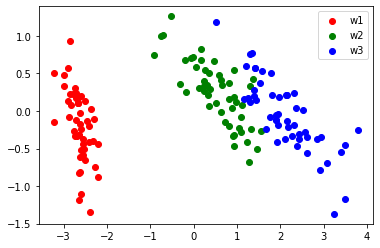

In [18]:
# Exercise 1 - Bayes decision theory
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Load the files data.npy and labels.npy in Colab and then into memory. 
data = np.load('data.npy')
labels = np.load('labels.npy')
# data represents a 150 (#objects) x 2 (#features) matrix

# 2. Extract three different sub-matrices:
# - Ojects of class 1 (labels = 1)
# - Objects of class 2 (labels = 2)
# - Objects of class 3 (labels = 3)

w1 = data[labels==1]
w2 = data[labels==2]
w3 = data[labels==3]

# 3. Show a scatterplot of the data by assigning a different color to each sub-matrix

plt.scatter(w1[:,0], w1[:,1], color="r",label="w1")
plt.scatter(w2[:,0], w2[:,1], color="g",label="w2")
plt.scatter(w3[:,0], w3[:,1], color="b",label="w3")
plt.legend()

# 4. For each of the classes, keep 40 cases as training data, and 10 cases as testing data

w1_training = w1[:40]
w2_training = w2[:40]
w3_training = w3[:40]

train = np.zeros((150,))
train[:40]  = 1
train[50:90] = 1
train[100:140] = 1
train_labels = labels[train == 1]
w_sample = data[train == 0]
w_labels = labels[train == 0]

# 5. Calculate the mean and covariance matrix for each of the training data of the 3 classes. 
# WARNING: the mean of each class must be a vector with 2 elements, the covariance matrix a 2x2 matrix.
# Hint: use numpy.cov for the covariance matrix (check the docs for details)
# https://numpy.org/doc/stable/reference/generated/numpy.cov.html

w1_mean = np.mean(w1_training,axis=0)
w2_mean = np.mean(w2_training,axis=0)
w3_mean = np.mean(w3_training,axis=0)
w1_cov = np.cov(w1_training.T)
w2_cov = np.cov(w2_training.T)
w3_cov = np.cov(w3_training.T)

# 6. Considering P as a multivariate normal density and using the probabilities 
# extracted from the training set, apply Bayes' decision rule to each point in 
# the testing set, assuming the priors are equivalent and equal to 1/3. 
# Slide 9 can help you here.

p_w1_x = multivariate_normal.pdf(w_sample, w1_mean, w1_cov)
p_w2_x = multivariate_normal.pdf(w_sample, w2_mean, w1_cov)
p_w3_x = multivariate_normal.pdf(w_sample, w3_mean, w1_cov)

# 7. Calculate the number of correctly classified points with respect to the 
# real classes (aka accuracy)
p_wi_x = np.concatenate([p_w1_x[:,np.newaxis],p_w2_x[:,np.newaxis],p_w3_x[:,np.newaxis]],axis=-1) 
predicted_labels = np.argmax(p_wi_x, axis=-1) + 1    # Argmax returns the index of the biggest element from 0, the labels start at 1 
accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Accuracy:", accuracy)

In [19]:
# Exercise 2 - Bayes decision theory

# Consider the data from the previous exercise!
# Re-do steps 6 and 7 by varying the priors P(w1),P(w2), and P(w3):
# a) P(w1) = 0.5 ,P(w2) = 0.4 ,P(w3) = 0.1
# b) P(w1) = 0.25 ,P(w2) = 0.5 ,P(w3) = 0.25
#
# What do you think about the new accuracy values? What happened?

#a)
p_w1_x = multivariate_normal.pdf(w_sample,w1_mean,w1_cov) * 0.5
p_w2_x = multivariate_normal.pdf(w_sample,w2_mean,w2_cov) * 0.4
p_w3_x = multivariate_normal.pdf(w_sample,w3_mean,w3_cov) * 0.1

p_wi_x = np.concatenate([p_w1_x[:,np.newaxis],p_w2_x[:,np.newaxis],p_w3_x[:,np.newaxis]],axis=-1) 
predicted_labels = np.argmax(p_wi_x, axis=-1) + 1   
print(predicted_labels)

accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Case a:" ,accuracy)

#b)
p_w1_x = multivariate_normal.pdf(w_sample,w1_mean,w1_cov) * 0.25
p_w2_x = multivariate_normal.pdf(w_sample,w2_mean,w2_cov) * 0.5
p_w3_x = multivariate_normal.pdf(w_sample,w3_mean,w3_cov) * 0.25

p_wi_x = np.concatenate([p_w1_x[:,np.newaxis],p_w2_x[:,np.newaxis],p_w3_x[:,np.newaxis]],axis=-1) 
predicted_labels = np.argmax(p_wi_x, axis=-1) + 1  
print(predicted_labels)

accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Case b:" ,accuracy)


[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 2 3 3 3 3 3 3 3 3]
Case a: 0.9666666666666667
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]
Case b: 1.0


[[ 0.04838414 -0.05315818]
 [-0.05315818  0.21666689]]
[[ 0.33771065 -0.19599353]
 [-0.19599353  0.19793824]]
[[ 0.57554229 -0.31934425]
 [-0.31934425  0.26698707]]


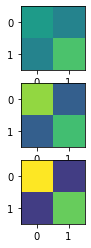

Accuracy: 1.0


In [20]:
# EXERCISE 3 - Discriminant Functions

# Consider the data from the first exercise

# 1. Display an imshow of the covariance matrices and figure out in which of the
# 3 cases we are (use arguments vmin=-0.5 and vmax=0.5 to set a fixed color range:
# -- Diagonal
# -- Equal
# -- Arbitrary
# 2. Compute the function g(x) and rank the points in the testing set using the 
# parameters trained on the training set (mu, sigma). (use the priors from exercise 1) 
# Hint: pay attention to the size of the matrices
# 3. Verify performance in terms of accuracy


#1
fig, ax = plt.subplots(3)
ax[0].imshow(w1_cov, vmin=-0.5, vmax=0.5)
print(w1_cov)
ax[1].imshow(w2_cov, vmin=-0.5, vmax=0.5)
print(w2_cov)
ax[2].imshow(w3_cov, vmin=-0.5, vmax=0.5)
print(w3_cov)
plt.show()

#2
g1x = []
g2x = []
g3x = []
for i in range(w_sample.shape[0]):
  g1x.append(-1/2*((w_sample[i,:]-w1_mean).T).dot(np.linalg.inv(w1_cov)).dot((w_sample[i,:]-w1_mean)) - (2/2)*np.log(2*np.pi)- 1/2 * np.log(np.linalg.det(w1_cov)) + np.log(1/3))
  g2x.append(-1/2*((w_sample[i,:]-w2_mean).T).dot(np.linalg.inv(w2_cov)).dot((w_sample[i,:]-w2_mean)) - (2/2)*np.log(2*np.pi)- 1/2 * np.log(np.linalg.det(w2_cov)) + np.log(1/3))
  g3x.append(-1/2*((w_sample[i,:]-w3_mean).T).dot(np.linalg.inv(w3_cov)).dot((w_sample[i,:]-w3_mean)) - (2/2)*np.log(2*np.pi)- 1/2 * np.log(np.linalg.det(w3_cov)) + np.log(1/3))


#3
gx = np.concatenate([np.array(g1x)[:,np.newaxis],np.array(g2x)[:,np.newaxis], np.array(g3x)[:,np.newaxis]],axis=-1)
predicted_labels = np.argmax(gx,axis=-1) + 1

#4 
accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Accuracy:" ,accuracy)


Accuracy: 0.9333333333333333
[-1.01043972 -0.01416463]


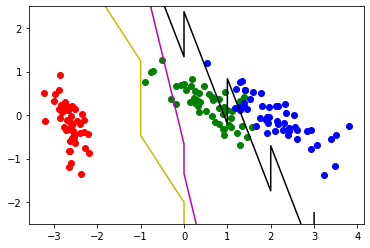

In [21]:
# EXERCISE 4 - Discriminant Functions

# Consider the data from the first exercise

# 1. Set the covariance matrices equal to the identity matrix and sigma^2 = 1
# 2. Compute the function g(x) and rank the points in the testing set using the parameters trained on the training set (mu, Sigma). (use the priors from exercise 1)
# 3. Check performance in terms of accuracy. Can you explain the reason in the change in performance?
# 4. Calculate parameters w and x0 for decision boundaries between classes 1 and 2, 2 and 3, 1 and 3
# 5. Make a scatter of the data from the 3 classes and also plot the decision boundaries

cov1_2 = np.eye(2,2)
cov2_2 = np.eye(2,2)
cov3_2 = np.eye(2,2)


#2
g1x = []
g2x = []
g3x = []
for i in range(w_sample.shape[0]):
  # Slide 10
  g1x.append((((1/1)*w1_mean).T).dot(w_sample[i,:]) - 1/(2*1)*(w1_mean.T).dot(w1_mean) + np.log(1/3))
  g2x.append((((1/1)*w2_mean).T).dot(w_sample[i,:]) - 1/(2*1)*(w2_mean.T).dot(w2_mean) + np.log(1/3))
  g3x.append((((1/1)*w3_mean).T).dot(w_sample[i,:]) - 1/(2*1)*(w3_mean.T).dot(w3_mean) + np.log(1/3))


#3
gx = np.concatenate([np.array(g1x)[:,np.newaxis],np.array(g2x)[:,np.newaxis], np.array(g3x)[:,np.newaxis]],axis=-1)
predicted_labels = np.argmax(gx,axis=-1) + 1

#4 
accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Accuracy:" ,accuracy)


#5
w_1 = w1_mean - w2_mean
x0_1 = 1/2* (w1_mean+w2_mean) - (1/np.linalg.norm(w1_mean-w2_mean,ord=2))*np.log(1)*(w1_mean-w2_mean)
print(x0_1)
w_2 = w2_mean - w3_mean
x0_2 = 1/2* (w2_mean+w3_mean) - (1/np.linalg.norm(w2_mean-w3_mean,ord=2))*np.log(1)*(w2_mean-w3_mean)
w_3 = w1_mean - w3_mean
x0_3 = 1/2* (w1_mean+w3_mean) - (1/np.linalg.norm(w1_mean-w3_mean,ord=2))*np.log(1)*(w1_mean-w3_mean)

#6
x = []
y1 = []
y2 = []
y3 = []
for c in range(-3,4,1):
  for r in range(-3,2,1):
    x.append(np.array([c]))
    y1.append(w_1.T.dot(np.array([c,r])-x0_1))
    y2.append(w_2.T.dot(np.array([c,r])-x0_2))
    y3.append(w_3.T.dot(np.array([c,r])-x0_3))
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

plt.plot(x,y1,'y')
plt.plot(x,y2,'k')
plt.plot(x,y3,'m')
plt.scatter(w1[:,0],w1[:,1],c='r')
plt.scatter(w2[:,0],w2[:,1],c='g')
plt.scatter(w3[:,0],w3[:,1],c='b')
plt.ylim((-2.5,2.5))

plt.show()


Accuracy: 0.8666666666666667


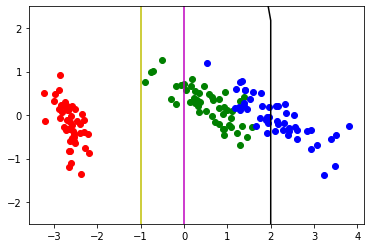

In [22]:
# EXERCISE 5 - Discriminant Functions

# 1. Set the covariance matrices equal to the covariance matrix for class 1 
# 2. Compute the function g(x) and rank the points in the testing set using the parameters trained on the training set (mu, Sigma). (use the priors from exercise 1)
# 3. Verify performance in terms of accuracy
# 4. Compute the parameters w and x0 for the decision boundaries between classes 1 and 2, 2 and 3, 1 and 3
# 5. Make a scatter of the data from the 3 classes and plot the decision boundaries as well. 

# Where does our classifier make the most mistakes?


cov1_3 = w1_cov
cov2_3 = w2_cov
cov3_3 = w3_cov


#2
g1x = []
g2x = []
g3x = []
for i in range(w_sample.shape[0]):
  # Slide 11
  g1x.append(np.linalg.inv(cov1_3).dot(w1_mean).dot(w_sample[i,:]) - 1/2*w1_mean.T.dot(np.linalg.inv(cov1_3)).dot(w1_mean) + np.log(1/3))
  g2x.append(np.linalg.inv(cov2_3).dot(w2_mean).dot(w_sample[i,:]) - 1/2*w2_mean.T.dot(np.linalg.inv(cov2_3)).dot(w2_mean) + np.log(1/3))
  g3x.append(np.linalg.inv(cov3_3).dot(w3_mean).dot(w_sample[i,:]) - 1/2*w3_mean.T.dot(np.linalg.inv(cov3_3)).dot(w3_mean) + np.log(1/3))


#3
gx = np.concatenate([np.array(g1x)[:,np.newaxis],np.array(g2x)[:,np.newaxis], np.array(g3x)[:,np.newaxis]],axis=-1)
predicted_labels = np.argmax(gx,axis=-1) + 1

#4 
accuracy = np.sum(predicted_labels == w_labels) / np.shape(w_sample)[0]
print("Accuracy:" ,accuracy)


#5
w_1 = np.linalg.inv(cov1_3).dot(w1_mean - w2_mean)
x0_1 = 1/2* (w1_mean+w2_mean) - np.log(1)/((w1_mean-w2_mean).T.dot(np.linalg.inv(cov1_3)).dot(w1_mean-w2_mean))*(w1_mean-w2_mean)

w_2 = np.linalg.inv(cov1_3).dot(w2_mean - w3_mean)
x0_2 = 1/2* (w2_mean+w3_mean) - np.log(1)/((w2_mean-w3_mean).T.dot(np.linalg.inv(cov1_3)).dot(w2_mean-w3_mean))*(w2_mean-w3_mean)

w_3 = np.linalg.inv(cov1_3).dot(w1_mean - w3_mean)
x0_3 = 1/2* (w1_mean+w3_mean) - np.log(1)/((w1_mean-w3_mean).T.dot(np.linalg.inv(cov1_3)).dot(w1_mean-w3_mean))*(w1_mean-w3_mean)

#6
x = []
y1 = []
y2 = []
y3 = []
for c in range(-3,4,1):
  for r in range(-3,2,1):
    x.append(np.array([c]))
    y1.append(w_1.T.dot(np.array([c,r])-x0_1))
    y2.append(w_2.T.dot(np.array([c,r])-x0_2))
    y3.append(w_3.T.dot(np.array([c,r])-x0_3))
x = np.array(x)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)

plt.plot(x,y1,'y')
plt.plot(x,y2,'k')
plt.plot(x,y3,'m')
plt.scatter(w1[:,0],w1[:,1],c='r')
plt.scatter(w2[:,0],w2[:,1],c='g')
plt.scatter(w3[:,0],w3[:,1],c='b')
plt.ylim((-2.5,2.5))
plt.show()
